## Introduction to Pandas 1

_from pandas documentation_

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

Good introduction here: https://pandas.pydata.org/pandas-docs/stable/10min.html#

## Demo with long-term rain data

Import modules

In [3]:
#If you're going to use matplotlib in a notebook, always start with this command FIRST
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt



Set some variables to make our lives easier

In [4]:
excelfile = 'Input_data/DCA_longterm_hourly.xlsx'

Import data into a Series or a DataFrame

In [5]:
df = pd.read_excel(excelfile,usecols=[4,9],index_col=0)

check out the data

In [6]:
#head prints the first x rows of data. 
#Try tail to print the last 5 rows of data. Or sample to print x random rows of data
df.head(10)

,Precip_clean
Datetime,
1948-05-01 01:00:00,0.00
1948-05-01 16:00:00,0.01
1948-05-01 17:00:00,0.02
1948-05-02 15:00:00,0.02
1948-05-02 16:00:00,0.12
1948-05-02 17:00:00,0.01
1948-05-02 18:00:00,0.02
1948-05-03 02:00:00,0.37
1948-05-03 03:00:00,0.11


In [7]:
df = df.rename(columns={"Precip_clean":"Precip_in"})

In [8]:
df.head()

,Precip_in
Datetime,
1948-05-01 01:00:00,0.00
1948-05-01 16:00:00,0.01
1948-05-01 17:00:00,0.02
1948-05-02 15:00:00,0.02
1948-05-02 16:00:00,0.12


### A dataframe is made up of series

In [9]:
df["Precip_in"]

Datetime
1948-05-01 01:00:00    0.00
1948-05-01 16:00:00    0.01
1948-05-01 17:00:00    0.02
1948-05-02 15:00:00    0.02
1948-05-02 16:00:00    0.12
1948-05-02 17:00:00    0.01
1948-05-02 18:00:00    0.02
1948-05-03 02:00:00    0.37
1948-05-03 03:00:00    0.11
1948-05-03 04:00:00    0.02
1948-05-04 21:00:00    0.03
1948-05-04 22:00:00    0.09
1948-05-04 23:00:00    0.13
1948-05-05 00:00:00    0.08
1948-05-05 01:00:00    0.28
1948-05-05 02:00:00    0.18
1948-05-05 03:00:00    0.03
1948-05-07 01:00:00    0.05
1948-05-07 02:00:00    0.06
1948-05-07 03:00:00    0.03
1948-05-07 04:00:00    0.09
1948-05-07 05:00:00    0.17
1948-05-07 06:00:00    0.22
1948-05-07 07:00:00    0.06
1948-05-07 08:00:00    0.01
1948-05-07 15:00:00    0.01
1948-05-07 19:00:00    0.08
1948-05-12 19:00:00    0.00
1948-05-12 20:00:00    0.00
1948-05-12 22:00:00    0.03
                       ... 
2013-12-23 03:00:00    0.13
2013-12-23 04:00:00    0.03
2013-12-23 05:00:00    0.05
2013-12-23 06:00:00    0.07
2013-12-23 

### It's easy to work with timeseries data

There are gaps in the time series that we imported. Let's make the index continuous and fill the gaps with NaN.

Pandas has lots of tools to help deal with NaNs later, although we may not get to it. You can replace them with values, leave them, or fill them based on rules.

Matplotlib has options for leaving them out, interpolating, filling, etc.


In [10]:
df = df.resample('H').mean()

In [11]:
df

,Precip_in
Datetime,
1948-05-01 01:00:00,0.00
1948-05-01 02:00:00,NaN
1948-05-01 03:00:00,NaN
1948-05-01 04:00:00,NaN
1948-05-01 05:00:00,NaN
1948-05-01 06:00:00,NaN
1948-05-01 07:00:00,NaN
1948-05-01 08:00:00,NaN
1948-05-01 09:00:00,NaN


In [12]:
df.info()   #give basic info on the dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 575606 entries, 1948-05-01 01:00:00 to 2013-12-29 14:00:00
Freq: H
Data columns (total 1 columns):
Precip_in    47862 non-null float64
dtypes: float64(1)
memory usage: 8.8 MB


### Let's query the data to only get data for 1990

In [14]:
df1990 = df["1990-01-01":"1990-12-31"] #dates are smart!
df1990.head()


,Precip_in
Datetime,
1990-01-01 00:00:00,0.07
1990-01-01 01:00:00,0.12
1990-01-01 02:00:00,0.08
1990-01-01 03:00:00,NaN
1990-01-01 04:00:00,NaN


In [15]:
df1990['Precip_in'].sum()

40.910000000000004

### Export results to a new excel spreadsheet

In [16]:
df1990.to_excel('Output_data/df1990.xlsx')

### Let's do some basic math and create a new column

In [17]:
def in_to_cm(inch):
    return inch * 2.54



In [18]:
df["precip_cm"] = df["Precip_in"].apply(in_to_cm)  #create a new column using apply()

In [19]:
df["precip_cm2"] = df["Precip_in"] * 2.54   #or, you can use bitwise basic math.

In [20]:
df.tail()

,Precip_in,precip_cm,precip_cm2
Datetime,,,
2013-12-29 10:00:00,0.19,0.4826,0.4826
2013-12-29 11:00:00,0.20,0.5080,0.5080
2013-12-29 12:00:00,0.32,0.8128,0.8128
2013-12-29 13:00:00,0.20,0.5080,0.5080
2013-12-29 14:00:00,0.03,0.0762,0.0762


In [ ]:
#df.to_excel('Output_data/long_rain.xlsx')
#only uncomment and execute this cell if you have a little bit of time to wait. that's about 10 MB of data

### Try converting hourly data to daily data. Get out your stopwatch!

In [21]:
#df is over 50 years of nearly hourly data - convert to daily
#Make sure datatime is the index!

df_daily = df.resample('D').sum()

In [22]:
df_daily.head()

,Precip_in,precip_cm,precip_cm2
Datetime,,,
1948-05-01,0.03,0.0762,0.0762
1948-05-02,0.17,0.4318,0.4318
1948-05-03,0.50,1.2700,1.2700
1948-05-04,0.25,0.6350,0.6350
1948-05-05,0.57,1.4478,1.4478


### Let's check to make sure pandas aggregated our data correctly

In [23]:
hourlysum = df["Precip_in"].sum()
dailysum = df_daily["Precip_in"].sum()

print("Total Hourly Sum is {} in. and Total Daily Sum is {} in.".format(hourlysum, dailysum))

Total Hourly Sum is 2602.84 in. and Total Daily Sum is 2602.84 in.


In [24]:
df_daily.to_excel("Output_data/df_daily.xlsx")  #Export data to Excel

### Pandas has many timeseries options

In [25]:
#every 6 hours?
df_6hours = df.resample('6H').sum()

In [26]:
df_6hours.tail()

,Precip_in,precip_cm,precip_cm2
Datetime,,,
2013-12-28 12:00:00,0.00,0.0000,0.0000
2013-12-28 18:00:00,0.00,0.0000,0.0000
2013-12-29 00:00:00,0.06,0.1524,0.1524
2013-12-29 06:00:00,0.70,1.7780,1.7780
2013-12-29 12:00:00,0.55,1.3970,1.3970


In [28]:
#every second business day??!!
df_bd = df.resample('2B').sum()
df_bd.tail()

,Precip_in,precip_cm,precip_cm2
Datetime,,,
2013-12-17,0.02,0.0508,0.0508
2013-12-19,0.24,0.6096,0.6096
2013-12-23,0.85,2.1590,2.1590
2013-12-25,0.00,0.0000,0.0000
2013-12-27,1.31,3.3274,3.3274


### Let's try to calculate the long-term average rainfall for the month of March in DC

In [29]:
#what's the average march rainfall?
dfmonth = df.resample('M').sum()          #Convert hourly data to monthly data
dfmonth['month'] = dfmonth.index.month    #Add a column showing the month by getting the month from the index date
dfmonth.head()


,Precip_in,precip_cm,precip_cm2,month
Datetime,,,,
1948-05-31,7.95,20.1930,20.1930,5
1948-06-30,5.35,13.5890,13.5890,6
1948-07-31,4.38,11.1252,11.1252,7
1948-08-31,9.00,22.8600,22.8600,8
1948-09-30,3.19,8.1026,8.1026,9


In [30]:
dfmonth

,Precip_in,precip_cm,precip_cm2,month
Datetime,,,,
1948-05-31,7.95,20.1930,20.1930,5
1948-06-30,5.35,13.5890,13.5890,6
1948-07-31,4.38,11.1252,11.1252,7
1948-08-31,9.00,22.8600,22.8600,8
1948-09-30,3.19,8.1026,8.1026,9
1948-10-31,3.08,7.8232,7.8232,10
1948-11-30,6.01,15.2654,15.2654,11
1948-12-31,4.69,11.9126,11.9126,12
1949-01-31,5.08,12.9032,12.9032,1


In [31]:
#what's the average march rainfall?
df_march = dfmonth[dfmonth['month']==3].mean()     #Take the mean of all march lines

In [32]:
a = df_march["Precip_in"]

In [33]:
a

3.4281538461538457

In [35]:
dfmonth

,Precip_in,precip_cm,precip_cm2,month
Datetime,,,,
1948-05-31,7.95,20.1930,20.1930,5
1948-06-30,5.35,13.5890,13.5890,6
1948-07-31,4.38,11.1252,11.1252,7
1948-08-31,9.00,22.8600,22.8600,8
1948-09-30,3.19,8.1026,8.1026,9
1948-10-31,3.08,7.8232,7.8232,10
1948-11-30,6.01,15.2654,15.2654,11
1948-12-31,4.69,11.9126,11.9126,12
1949-01-31,5.08,12.9032,12.9032,1


In [34]:
dfmonth[dfmonth['month']==3].mean()

Precip_in     3.428154
precip_cm     8.707511
precip_cm2    8.707511
month         3.000000
dtype: float64

<IPython.core.display.Javascript object>


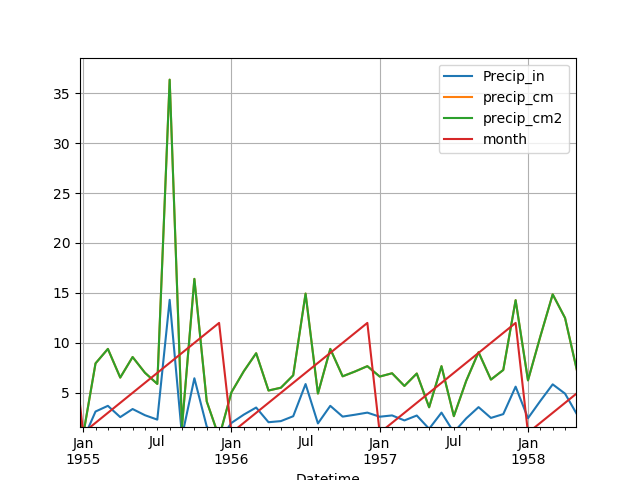

In [36]:
dfmonth.plot(grid=True)

<IPython.core.display.Javascript object>


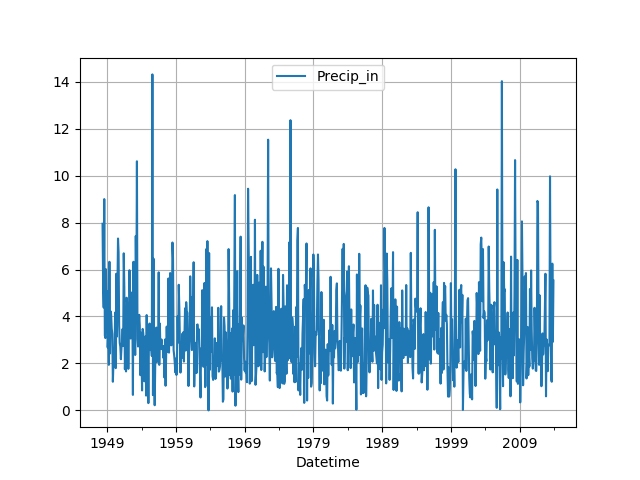

In [37]:
dfmonth.plot(y="Precip_in",grid=True)